In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib


In [3]:
df = pd.read_csv("data/processed_heart_disease.csv")

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (297, 20)
Target shape: (297,)


Explained variance ratio: [8.02625179e-01 1.80860493e-01 4.27501783e-03 2.49279915e-03
 2.34744001e-03 1.80032880e-03 1.36381780e-03 7.30949339e-04
 6.31592100e-04 5.96929626e-04 5.12016318e-04 4.31990561e-04
 3.76514281e-04 3.25591337e-04 2.30445817e-04 1.23952532e-04
 1.11189314e-04 8.16528579e-05 5.23375419e-05 2.97631210e-05]


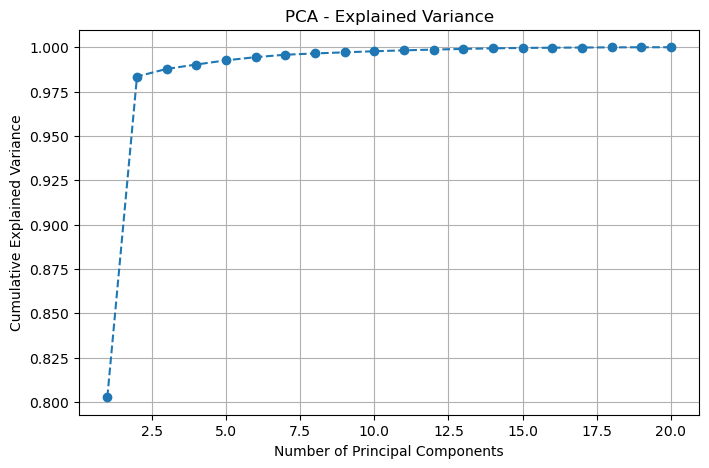

In [4]:
# Initialize PCA
pca = PCA()

# Fit PCA on the features
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()


In [5]:
pca = PCA(n_components=0.95)
X_pca_reduced = pca.fit_transform(X)
print("Reduced feature shape:", X_pca_reduced.shape)

Reduced feature shape: (297, 2)


In [7]:
df_pca = pd.DataFrame(X_pca_reduced)
df_pca["target"] = y.values
df_pca.to_csv("data/heart_disease_pca.csv", index=False)
print("PCA dataset saved!")

PCA dataset saved!


In [9]:
import pandas as pd

# Load the processed or PCA dataset
df = pd.read_csv("data/processed_heart_disease.csv")  # or heart_disease_pca.csv

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (297, 20)
Target shape: (297,)


Feature ranking:
1. chol: 0.1394
2. oldpeak: 0.1233
3. remainder__age: 0.1126
4. age: 0.1113
5. remainder__trestbps: 0.0987
6. cat__thal_7.0: 0.0654
7. cat__cp_4.0: 0.0566
8. thalach: 0.0435
9. cat__ca_1.0: 0.0397
10. cat__ca_2.0: 0.0337
11. cat__slope_2.0: 0.0336
12. remainder__sex: 0.0296
13. cat__restecg_2.0: 0.0266
14. cat__ca_3.0: 0.0215
15. cat__cp_3.0: 0.0170
16. trestbps: 0.0169
17. cat__thal_6.0: 0.0124
18. cat__cp_2.0: 0.0094
19. cat__slope_3.0: 0.0065
20. cat__restecg_1.0: 0.0022


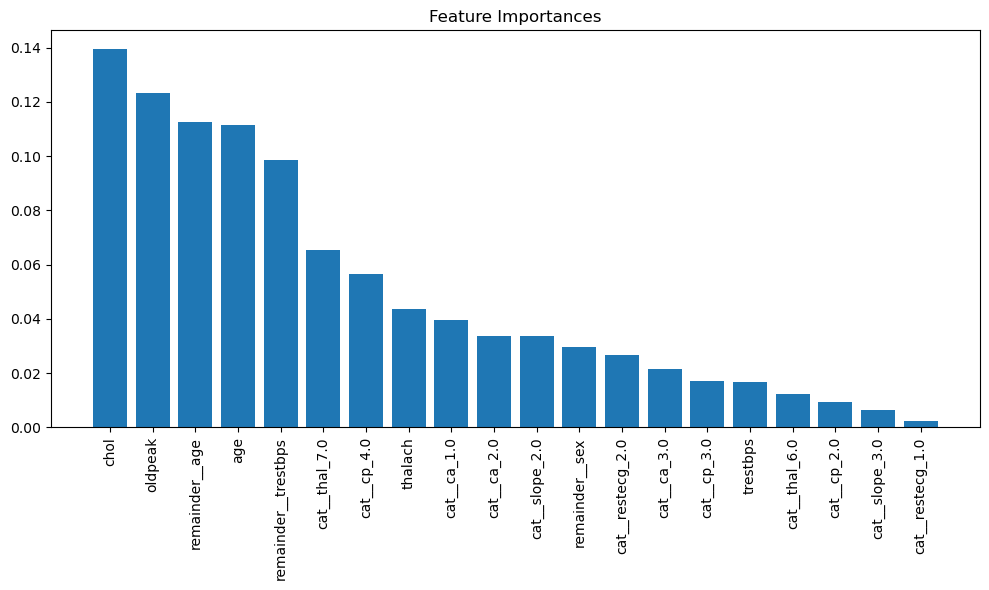

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get importance scores
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(len(feature_names)):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Base model
model = LogisticRegression(max_iter=1000)

# RFE to select top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Top 10 selected features by RFE:", list(selected_features))


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top 10 selected features by RFE: ['cat__cp_4.0', 'cat__restecg_2.0', 'cat__slope_2.0', 'cat__ca_1.0', 'cat__ca_2.0', 'cat__ca_3.0', 'cat__thal_6.0', 'cat__thal_7.0', 'remainder__sex', 'oldpeak']


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.feature_selection import chi2

# Chi-square test only works with non-negative features
X_non_negative = X - X.min()  # shift all values to be >=0
chi_scores, p_values = chi2(X_non_negative, y)

chi_results = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores, "p-value": p_values})
chi_results = chi_results.sort_values(by="Chi2 Score", ascending=False)
print(chi_results)


                Feature  Chi2 Score       p-value
19              oldpeak   84.615256  1.830607e-17
18              thalach   83.415229  3.289413e-17
14  remainder__trestbps   67.598200  7.291309e-14
12       remainder__age   59.737779  3.293268e-12
11        cat__thal_7.0   46.644612  1.808239e-09
2           cat__cp_4.0   42.638819  1.229648e-08
8           cat__ca_2.0   33.865361  7.941005e-07
9           cat__ca_3.0   29.263719  6.909948e-06
5        cat__slope_2.0   21.414294  2.620573e-04
1           cat__cp_3.0   20.404160  4.155197e-04
16             trestbps   19.263557  6.975538e-04
17                 chol   18.273130  1.091267e-03
0           cat__cp_2.0   16.518950  2.396304e-03
7           cat__ca_1.0   15.246267  4.216774e-03
10        cat__thal_6.0   10.982280  2.676388e-02
13       remainder__sex    7.511646  1.111968e-01
3      cat__restecg_1.0    6.418458  1.700012e-01
4      cat__restecg_2.0    5.933221  2.041912e-01
6        cat__slope_3.0    5.297864  2.580769e-01


In [16]:
X_selected = X[selected_features]
df_selected = X_selected.copy()
df_selected["target"] = y.values

df_selected.to_csv("data/heart_disease_selected.csv", index=False)
print("Selected features dataset saved!")

Selected features dataset saved!
